Importing the Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing


In [30]:
#loading the csv data to a Pandas Dataframe
gold_data =pd.read_csv('/content/gld_price_data.csv')

In [31]:
#print first 5 rows in the dataframe
gold_data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [32]:
#print the last 5row of dtaframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [33]:
#no of row and columns
gold_data.shape

(2290, 6)

In [34]:
#getting some basic imformation about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [35]:
#checking the no of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [37]:
#getting the statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation
1.**Positive correlation** - in this we take two variables and in which 1 var increases and other var decreases.
they are directly proportional
2.**Negative correlation** - in this if one value increases and other value decreases.they are inversely proportional.

In [38]:
correlation = gold_data.corr()

<ipython-input-38-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

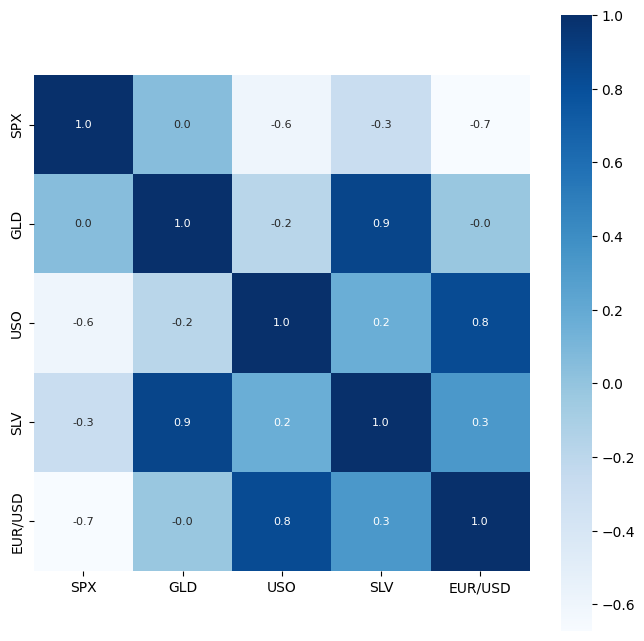

In [39]:
#constructing the heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True, square=True , fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [40]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-41-6880bd40a181>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

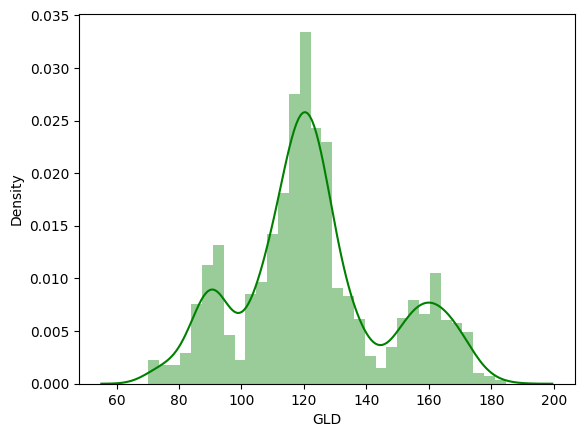

In [41]:
#check the distribution of the gold price 
sns.distplot(gold_data['GLD'],color='green')

splitting the feature and target


axis=1 is col, 
axis=0 is row

In [42]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [43]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [44]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into training data and test data

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

model Training:
Random forest Regressor

It consists of more than 1 models joined together.(ensembled model where we have multiple decision tree and value will be prdicted using all the decision trees)


In [46]:
regressor= RandomForestRegressor(n_estimators=100)

In [47]:
#training  the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [48]:
#prediction on test data
test_data_prediction =regressor.predict(x_test) 

In [49]:
print(test_data_prediction)

[168.69809937  81.7729999  116.06190001 127.64600063 120.60970143
 154.76369856 150.48699839 126.24460023 117.68569864 126.04140057
 116.8528007  172.0802011  141.5116981  167.74459894 115.21930038
 117.34570043 138.59430362 169.82470026 159.10800269 158.35179921
 155.22710094 125.34320013 175.83430006 157.11920395 125.21230059
  93.81659972  78.15230004 120.57200008 119.09389923 167.51729964
  88.1637005  125.16380025  91.08470107 117.73410019 121.07659896
 137.06240021 115.32730173 115.21960112 145.82439987 107.32700089
 104.19350237  87.09619789 126.40260067 117.73100054 153.82789873
 119.54129968 108.36519994 108.03769841  93.02850037 127.16339789
  75.6128002  113.6662991  121.22940043 111.19589927 118.79369902
 120.9191996  159.35859967 166.83820113 146.79899673  85.80559871
  94.11080054  86.82349876  90.58360037 119.09880052 126.44980061
 127.64899966 170.67760059 122.26489942 117.58369855  98.72810038
 168.42490073 142.71079779 131.99600234 121.21970229 120.94479951
 119.75480

In [50]:
# R squared error
error_score= metrics.r2_score(y_test, test_data_prediction)
print("R squared error: " , error_score)

R squared error:  0.9891978772822275


Compare the actual values and the predicted values in a plot

In [51]:
y_test= list(y_test)

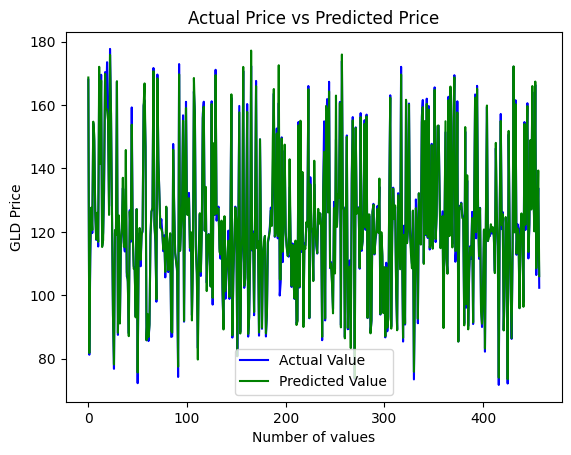

In [52]:
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()